## TEXT MINING ASSIGNMENT(ELON MUSK)
Dataset: Elon_Musk.csv

In [4]:
!pip install spacy

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [7]:
# Loading dataset
tweets = pd.read_csv(r"C:\Users\ravindra sharma\Downloads\Elon_musk.csv", encoding = 'latin1', error_bad_lines=False)

C:\Users\ravindra sharma\AppData\Local\Temp\ipykernel_10704\3401387957.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv(r"C:\Users\ravindra sharma\Downloads\Elon_musk.csv", encoding = 'latin1', error_bad_lines=False)


### Data Preprocessing for Sentiment Analysis

In [8]:
tweets.shape

(1999, 2)

In [9]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [10]:
# Dropping additional index column 'Unnamed'
tweets = tweets.drop('Unnamed: 0', axis = 1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [11]:
# removing both the leading and the trailing characters such as spaces in tweets
tweets = [x.strip() for x in tweets.Text]

In [12]:
# removes empty strings, because they are considered in Python as False
tweets = [x for x in tweets if x]

In [13]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ravindra
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [17]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [20]:
afinn= pd.read_csv(r"C:\Users\ravindra sharma\Downloads\Afinn.csv", sep=',', encoding='latin-1')
afinn.shape

(2476, 3)

In [21]:
afinn.head()

,Palabra,Puntuacion,Word
0,a bordo,1.0,aboard
1,abandona,-2.0,abandons
2,abandonado,-2.0,abandoned
3,abandonar,-2.0,abandon
4,abatido,-2.0,dejected


In [24]:
affinity_scores = afinn.set_index(['Palabra'])['Puntuacion'].to_dict()

In [25]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
# test that it works
calculate_sentiment(text = 'good')

0

In [30]:
sent_df['sentiment_neg'] = sent_df['sentence'].apply(calculate_sentiment)

In [31]:
sent_df

,sentence,sentiment_neg
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0.0
1,Have you tried it?,0.0
2,@joerogan @Spotify Great interview!,0.0
3,@gtera27 Doge is underestimated @teslacn Congr...,0.0
4,Now on to the next for even more!!,0.0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0.0
920,"It may never pay out, as the stock cant b ht...",-1.0
921,Details Aug 28.,0.0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2.0


In [32]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [33]:
sent_df.sort_values(by='sentiment_neg')

,sentence,sentiment_neg,word_count
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,-4.0,65
837,Cool Model 3 review by @iamjamiefoxx https://t...,-3.0,61
156,We couldnt get everything done in https://t....,-3.0,65
591,@m2jr @BernieSanders Implicit conflation of co...,-2.0,16
732,"Will only be on relatively recent cars, https...",-2.0,16
...,...,...,...
490,Gives a false sense of https://t.co/aIGaEnC8f...,3.0,41
110,@Erdayastronaut @lexfridman Or at least the op...,3.0,63
639,Support from government &amp; people is super ...,3.0,8
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,3.0,65


In [34]:
# Maximum sentiment value
sent_df['sentiment_neg'].max()

3.0

In [35]:
# tweet which is having max sentiment value
sent_df[sent_df['sentiment_neg']==16]

,sentence,sentiment_neg,word_count


In [36]:
# Full tweet at index 105
sent_df['sentence'][105]

'@Erdayastronaut @SpaceX Was also thinking that SpaceX Boca should hold fun parties and give tours for the community from time to time @Erdayastronaut @SpaceX I super support public spaces around our production &amp; launch sites, wherever it can be done\x85 https://t.co/wmqWcT2WFH @Christo49699922 @sean18743005 @Erdayastronaut @SpaceX That too @sean18743005 @Erdayastronaut @SpaceX Catapult high into the air &amp; land on the roof with a base jumping parachute (the only way to travel) @Erdayastronaut @SpaceX That\x92s actually our restaurant, but SpaceX is building a futuristic bar at the top of the h\x85 https://t.co/z2UmtGSAoI @techreview And increase fun!'

In [37]:
# minimum sentiment value

In [38]:
sent_df['sentiment_neg'].min()

-4.0

In [39]:
# tweet which is having min sentiment value
sent_df[sent_df['sentiment_neg']==-8]

,sentence,sentiment_neg,word_count


In [40]:
# Full tweet at index 647
sent_df['sentence'][647]

'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.'

In [41]:
# Sentiment score of the whole review
sent_df['sentiment_neg'].describe()

count    924.000000
mean      -0.019481
std        0.562121
min       -4.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: sentiment_neg, dtype: float64

In [42]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_neg']<=0]

,sentence,sentiment_neg,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0.0,13
1,Have you tried it?,0.0,4
2,@joerogan @Spotify Great interview!,0.0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0.0,13
4,Now on to the next for even more!!,0.0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0.0,11
920,"It may never pay out, as the stock cant b ht...",-1.0,31
921,Details Aug 28.,0.0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2.0,47


In [43]:
sent_df[sent_df['sentiment_neg']>=10]

,sentence,sentiment_neg,word_count


In [44]:
sent_df['index']=range(0,len(sent_df))

C:\Users\ravindra sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='sentiment_neg', ylabel='Density'>

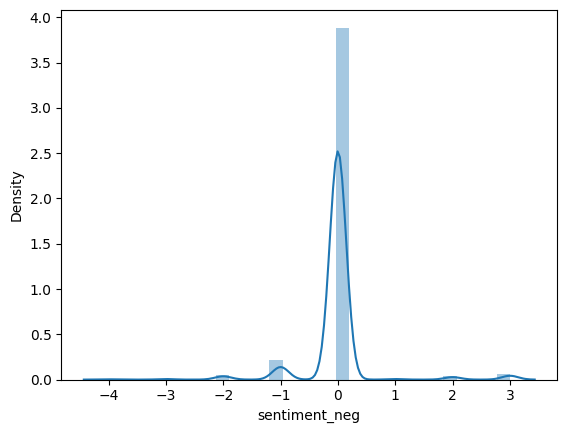

In [45]:
import seaborn as sns
sns.distplot(sent_df['sentiment_neg'])

<AxesSubplot: xlabel='index', ylabel='sentiment_neg'>

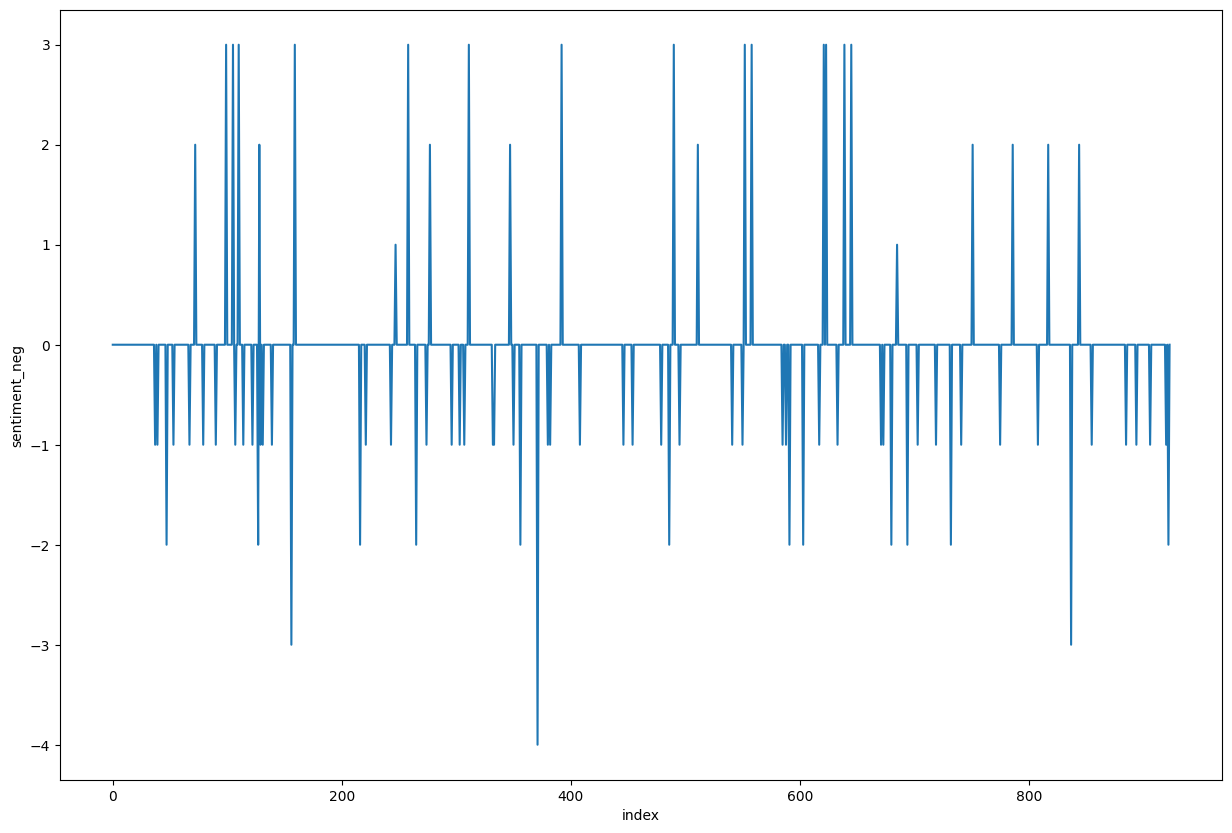

In [46]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_neg',x='index',data=sent_df)

C:\Users\ravindra sharma\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_neg'>

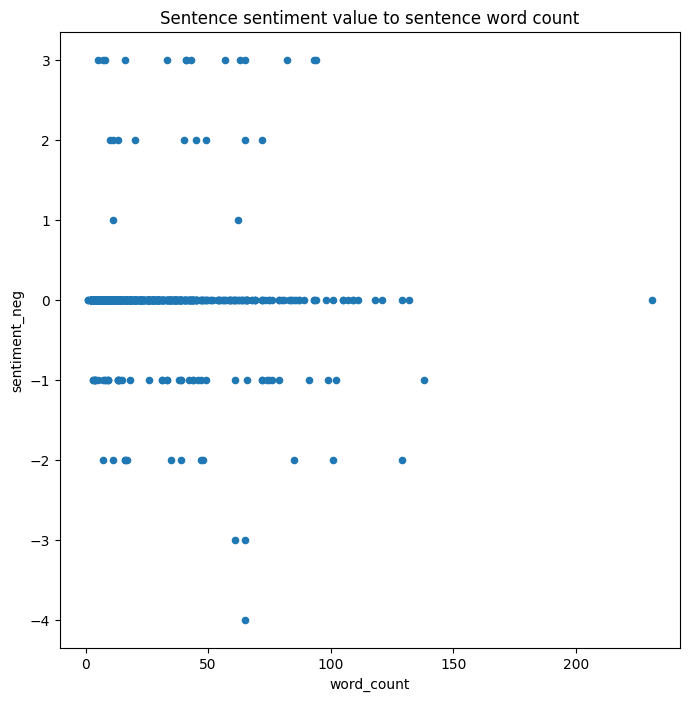

In [47]:
sent_df.plot.scatter(x='word_count', y='sentiment_neg', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [48]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_neg'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)

In [49]:
sent_df.sample(10)

,sentence,sentiment_neg,word_count,index,Sentiment_Class
728,"@GiulioCoraggio Absolutely, but it doesnt see...",0.0,65,728,Neutral
482,"@RationalEtienne @toadmeister Yes, failure to ...",0.0,40,482,Neutral
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",0.0,84,42,Neutral
571,Maybe a little faster.,0.0,4,571,Neutral
212,Autonomous docking tomorrow at approximately 1...,0.0,26,212,Neutral
448,@PPathole @flyerandyp @mojosusan Mobi-C has to...,0.0,12,448,Neutral
833,<U+0001F923><U+0001F923> RT @ccsakuras: https:...,0.0,18,833,Neutral
134,@ashleevance Westworld The Last Kingdom show i...,0.0,10,134,Neutral
699,Not just about the chips.,0.0,5,699,Neutral
188,This is https://t.co/zO01QsU1wt RT @SpaceX: S...,0.0,12,188,Neutral


<AxesSubplot: xlabel='Sentiment_Class', ylabel='count'>

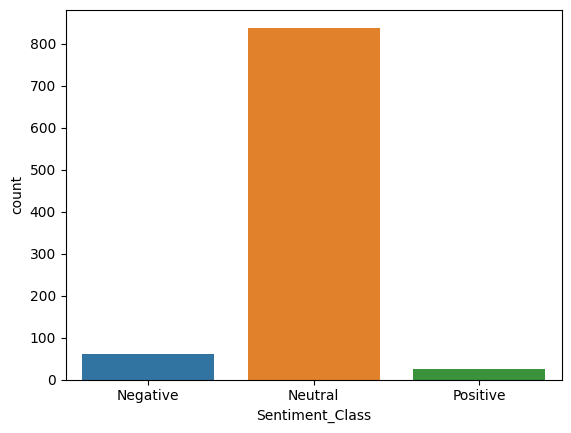

In [50]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)

In [51]:
sent_df['Sentiment_Class'].value_counts()

Neutral     838
Negative     61
Positive     25
Name: Sentiment_Class, dtype: int64

# according to sentiment value positive tweet more as compare to negative tweets